In [1]:
#importng libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
#parsing data and reading in a dataframe
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv("C:/Users/HP/Downloads/AirPassengers.csv", parse_dates=[0], index_col='Month',date_parser=dateparse)


In [13]:
ts = data["#Passengers"]

In [4]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [5]:
ts['1949-01-01']


112

In [6]:
from datetime import datetime
ts[datetime(1949,1,1)]

112

In [7]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

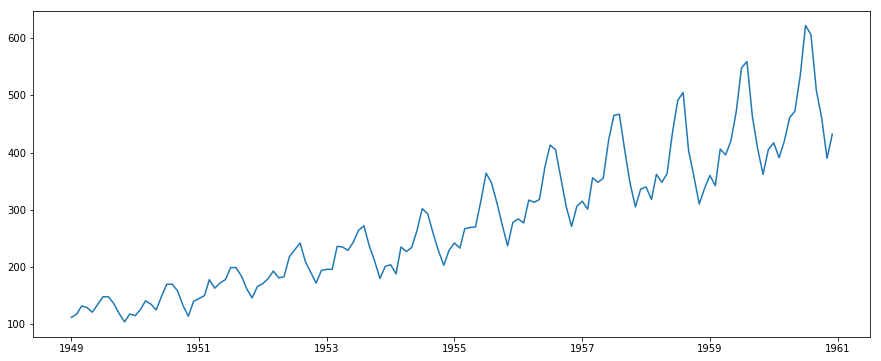

In [8]:
plt.plot(ts)

In [9]:
from statsmodels.tsa.stattools import adfuller

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
dftest = adfuller(ts, autolag='AIC')


In [19]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    

In [20]:
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64

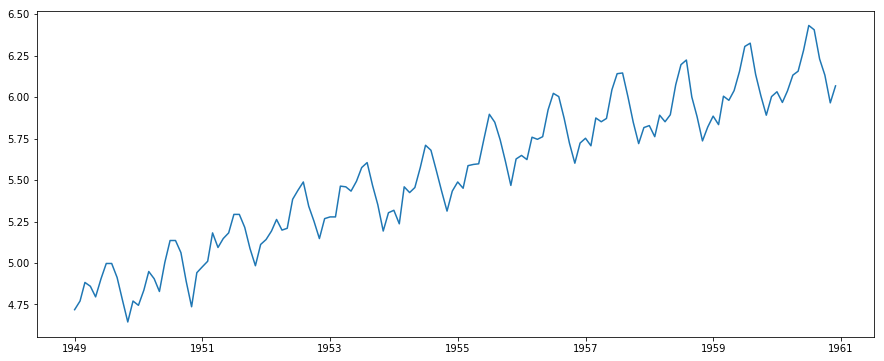

In [22]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


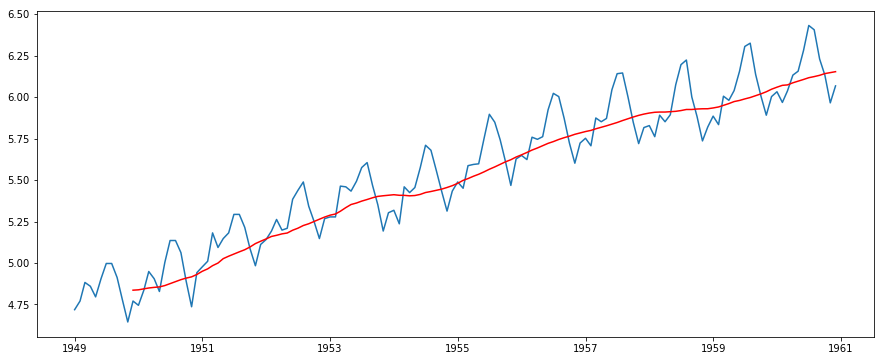

In [25]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

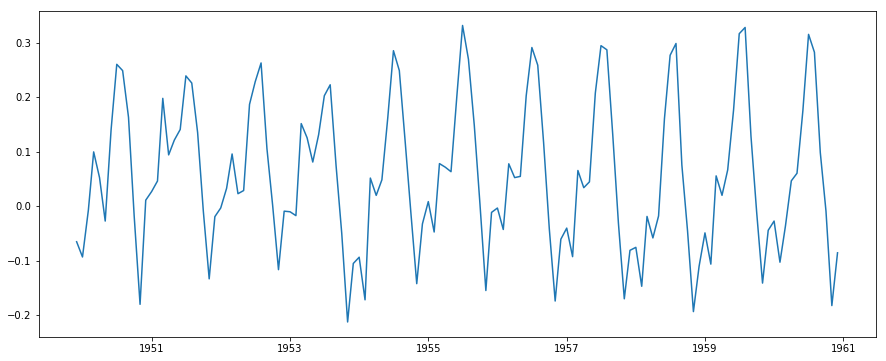

In [26]:
ts_log_moving_avg_diff = ts_log - moving_avg
plt.plot(ts_log_moving_avg_diff)

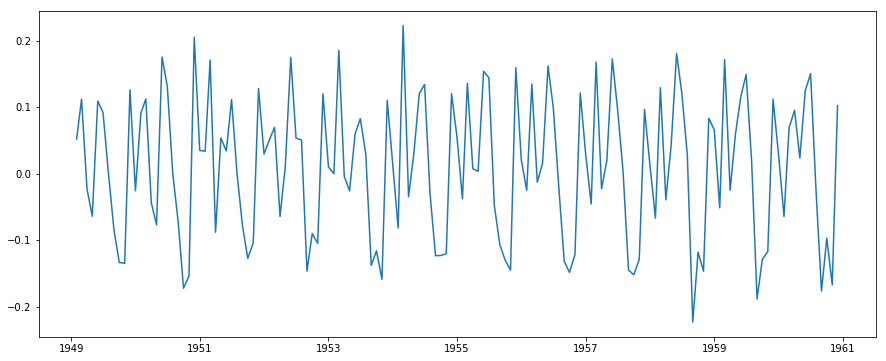

In [30]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [42]:
ts_log_diff.dropna(inplace=True)

In [31]:
from statsmodels.tsa.stattools import acf,pacf

In [45]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20,method='ols')

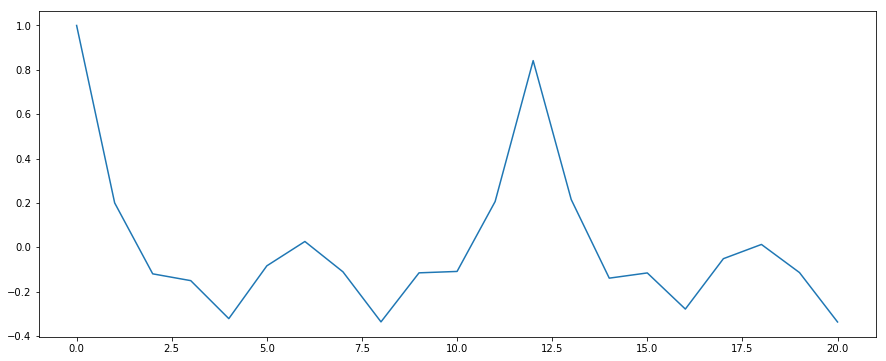

In [47]:
plt.plot(lag_acf)

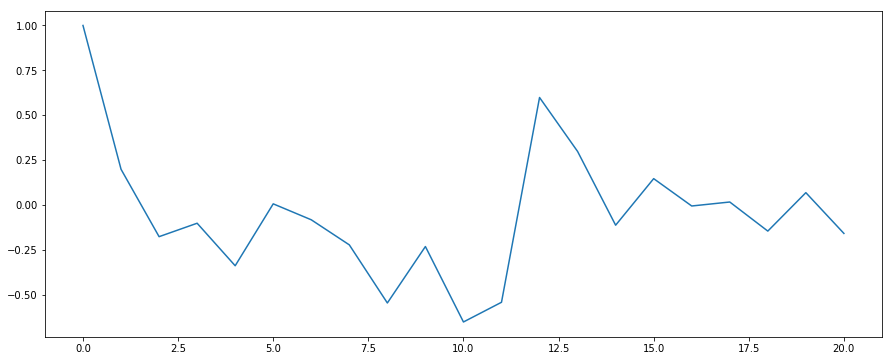

In [48]:
plt.plot(lag_pacf)

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [52]:
model = ARIMA(ts_log_diff,order=(2,0,2))
results = model.fit()

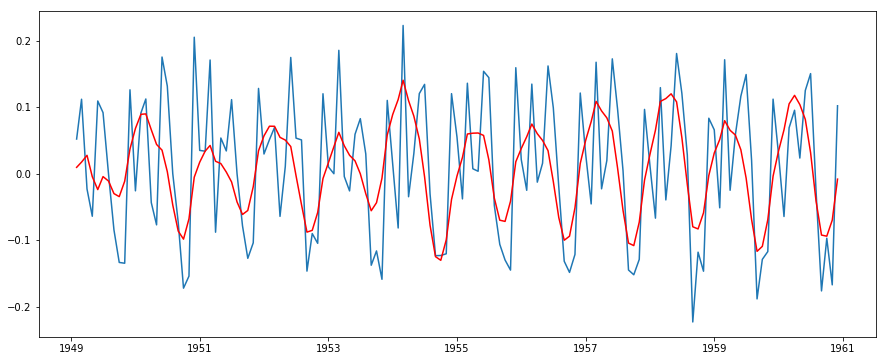

In [55]:
plt.plot(ts_log_diff)
plt.plot(results.fittedvalues,color='red')

In [58]:
results.fittedvalues.cumsum() + 4.7184988712950942

Month
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665109
1949-11-01    4.653831
1949-12-01    4.691043
1950-01-01    4.759178
1950-02-01    4.848612
1950-03-01    4.938641
1950-04-01    5.004793
1950-05-01    5.048846
1950-06-01    5.084313
1950-07-01    5.087414
1950-08-01    5.040286
1950-09-01    4.953934
1950-10-01    4.855468
1950-11-01    4.787622
1950-12-01    4.782395
1951-01-01    4.799780
1951-02-01    4.833795
1951-03-01    4.876356
1951-04-01    4.895104
1951-05-01    4.910364
1951-06-01    4.912853
1951-07-01    4.900445
                ...   
1958-07-01    5.885054
1958-08-01    5.868589
1958-09-01    5.788747
1958-10-01    5.705604
1958-11-01    5.646735
1958-12-01    5.644072
1959-01-01    5.675271
1959-02-01    5.726716
1959-03-01    5.806523
1959-04-01    5.871857
1959-05-01    5.930047
1959-06-01    5.966121
1959-